In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_47417_G')

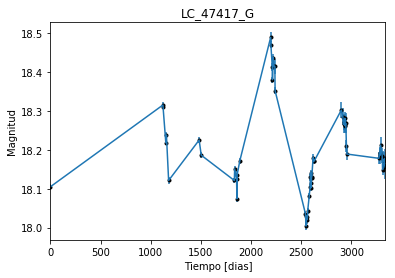

In [2]:
data = np.genfromtxt('LC_47417_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_47417_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

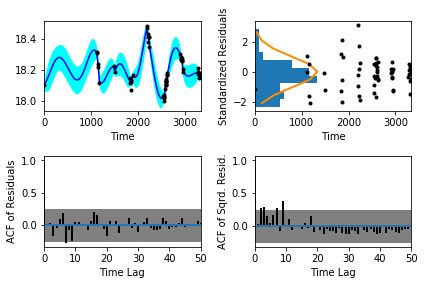

In [5]:
sample.assess_fit()

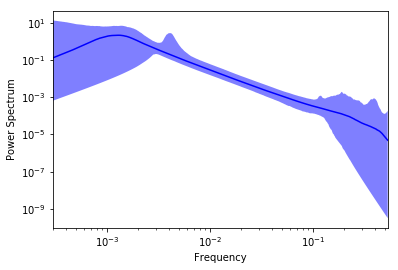

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_47417_G')

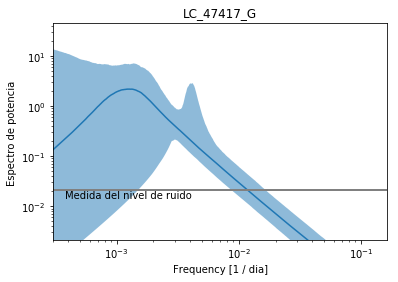

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_47417_G')

Text(0.5,1,'Prediccion , valor esperado LC_47417_G')

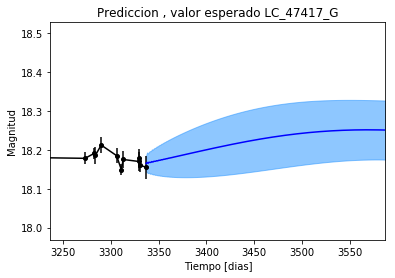

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_47417_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_47417_G')

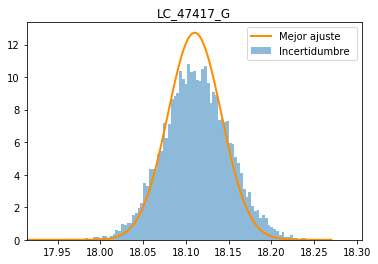

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_47417_G')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_G')

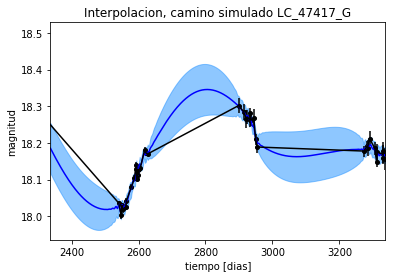

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_G')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_G')

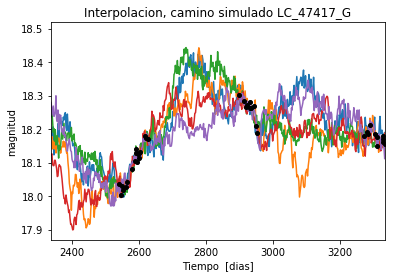

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 347.921732808
Median: 0.0310110362275
Standard deviation: 0.106735217748
68% credibility interval: [ 0.01281014  0.08209024]
95% credibility interval: [ 0.00069139  0.37125928]
99% credibility interval: [  3.55827465e-04   7.68360359e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 321.069373493
Median: 0.0307469074024
Standard deviation: 0.101277604953
68% credibility interval: [ 0.0126338  0.0808603]
95% credibility interval: [ 0.00064572  0.35203849]
99% credibility interval: [  3.55827465e-04   7.41597180e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 900.388218831
Median: 0.000443731221747
Standard deviation: 0

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 781.798645829
Median: 145.012636
Standard deviation: 2.31088972332
68% credibility interval: [ 142.31820673  146.89698894]
95% credibility interval: [ 139.34046592  148.13137755]
99% credibility interval: [ 137.24540391  148.52835415]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 636.622321202
Median: 0.467711513829
Standard deviation: 1.65908535836
68% credibility interval: [ 0.21352669  1.49097149]
95% credibility interval: [ 0.09436012  6.37564747]
99% credibility interval: [  0.05609297  10.30185496]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 118.08105092
Median: 5.59104027334
Standard deviation: 12.279917208
68% credibility interval: [  1.51219639  25.83505521]
95% credibility interval: [  0.59220834  

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4070.6679262
Median: 13150563.7335
Standard deviation: 6.49275869477e+47
68% credibility interval: [  2.73807120e-02   5.37831734e+16]
95% credibility interval: [  9.69120786e-53   4.97583351e+35]
99% credibility interval: [  2.97030614e-93   7.88602336e+36]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1704.19534609
Median: 18.2075358595
Standard deviation: 0.0313387465597
68% credibility interval: [ 18.18305408  18.23225406]
95% credibility interval: [ 18.14526471  18.26946933]
99% credibility interval: [ 18.09637283  18.31452764]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 112.306055325
Median: 0.360635059673
Standard deviation: 0.26925555758
68% credibility interval: [ 0.1904727   0.79338663]
95% credibility interval: [ 0.1191597   0.96868825]
99% credibility interval: [ 0.07800722  1.0409611 ]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 112.306055325
Median: 0.360635059673
Standard deviation: 0.26925555758
68% credibility interval: [ 0.1904727   0.79338663]
95% credibility interval: [ 0.1191597   0.96868825]
99% credibility interval: [ 0.07800722  1.0409611 ]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 197.937443785
Median: 0.00112637574866
Standard deviation: 0.0009042097643

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 781.798645829
Median: 145.012636
Standard deviation: 2.31088972332
68% credibility interval: [ 142.31820673  146.89698894]
95% credibility interval: [ 139.34046592  148.13137755]
99% credibility interval: [ 137.24540391  148.52835415]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1624.26398434
Median: 0.0105218817401
Standard deviation: 0.00657506040592
68% credibility interval: [ 0.00750163  0.01547783]
95% credibility interval: [ 0.00552092  0.02906947]
99% credibility interval: [ 0.00479296  0.04691693]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1494.69757918
Median: 0.95200372364
Standard deviation: 0.185287569714
68% credibility interval: [ 0.78971129  1.15001134]
95% credibility interval: [ 0.67080582  1.38779695]
99% credibility interval: [ 0.60904063  1.57477673]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1246.97446736
Median: 9.32982296678e-09
Standard deviation: 0.198501009674
68% credibility interval: [  1.51807417e-18   7.91317638e-04]
95% credibility interval: [  6.47680375e-38   4.54332626e-01]
99% credibility interval: [  8.29416131e-39   1.48758210e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 347.921732808
Median: (-0.194848087185-1.82330379112j)
Standard deviation: 1.81985780513
68% credibility interval: [-0.51578817-2.38959006j -0.08048851-1.19083189j]
95% credibility interval: [-2.33269085-1.49506768j -0.00434416-0.9339742j ]
99% credibility interval: [ -4.82775052e+00-0.02722671j  -2.23572990e-03-1.72230438j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 321.069373493
Median: (-0.193188516832+2.13753870174j)
Standard deviation: 1.80750226041
68% credibility interval: [-0.50806024+4.76951073j -0.07938049+2.78474602j]
95% credibility interval: [-2.21192308+6.58493964j -0.00405717+5.05146735j]
99% credibility interval: [ -4.65959251e+00+3.96285351j  -2.23572990e-03+1.72230438j]
Posterior summary for para